### 패키지 가져오기

In [162]:
import pandas as pd
# pandas 데이터프레임 출력시 컬럼과 행에 대한 출력갯수 제한을 없앰
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy  as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [163]:
# 산탄데르 데이터셋의 파일 크기가 커서 구글드라이브 마운트를 권장
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
trainCSV = '/content/drive/MyDrive/[2022]AICE자격증반/AICE예제/kaggle/train.csv'
testCSV  = '/content/drive/MyDrive/[2022]AICE자격증반/AICE예제/kaggle/test.csv'

train_df = pd.read_csv(trainCSV)
test_df  = pd.read_csv(testCSV)

In [165]:
train_df.head(100)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [166]:
# 'ID'컬럼을 삭제
train_df.drop('ID',axis=1, inplace=True)

In [167]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 370 entries, var3 to TARGET
dtypes: float64(111), int64(259)
memory usage: 214.6 MB


In [168]:
# 전체 컬럼의 갯수가 371개
# 그중 260개 컬럼은 int64타입, 111개 컬럼은 float64
train_df.dtypes.value_counts()

int64      259
float64    111
dtype: int64

In [169]:
# unique()함수는 train_df['var3'] series에서 고유한 값만 하나씩 리스트로 생성
# nunique()함수는 리스트의 갯수를 확인
train_df['var3'].nunique()

208

In [170]:
# features_to_drop은 pandas series데이터 타입
features_to_drop = train_df.nunique()
# features_to_drop중에 값이 1인 것만 선택해서, 그 데이터의 index값만 저장
features_to_drop = features_to_drop.loc[features_to_drop.values==1].index
# now drop these columns from both the training and the test datasets
train_df = train_df.drop(features_to_drop,axis=1)
test_df  = test_df.drop(features_to_drop,axis=1)

In [171]:
train_df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var39,ind_var44_0,ind_var44,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var42,saldo_var44,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_ult1,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_aport_var33_ult1,num_var7_emit_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_u

In [172]:
# 결측치는 없는 것으로 확인
train_df.isnull().sum()

var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0                       0
ind_var8                         0
ind_var12_0                      0
ind_var12           

In [173]:
# 마지막 컬럼은 'TARGET'이므로 마지막 컬럼만 제외
# X = train_df.iloc[:,:-1]
X = train_df.drop('TARGET', axis=1)
y = train_df['TARGET']

In [174]:
X.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var39,ind_var44_0,ind_var44,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var42,saldo_var44,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_ult1,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_aport_var33_ult1,num_var7_emit_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_u

In [175]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: TARGET, dtype: int64

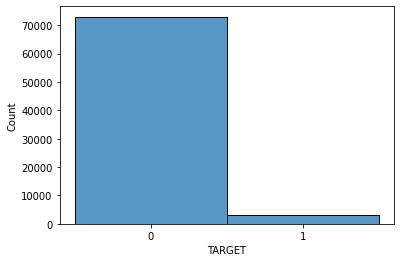

In [176]:
# Target값을 histplot으로 시각화
# y의 value값을 문자열로 변환
hist_df = y.astype(str)
sns.histplot(hist_df)

In [177]:
# 'var3'에서 이상치 값이 존재 
print(train_df['var3'].unique())
print(train_df['var3'].median())
train_df['var3'].replace(-999999, 2, inplace=True)
print(train_df['var3'].unique())

[      2     229     178       0       8       3       4      10     110
       7     177       1       6     137      17 -999999      13      14
     148       5      11      15     122      22       9      58     121
      12     127      33     125     209      72      31      51      16
     107     174     141     191     104     129      18      49      73
      94     131     219     187     114      28      89     115      53
     126      47      84     235     161     197      23      30     146
     158     138      26     120      66     216     215      90      20
      21     103     192     142      29     163     223      95      98
      38     156      97     105     150     183     184      52      54
     220      25     225      86     124      27     162      19     195
     218      24      60     108      82      36     102     175     144
     169      64     201      79      91     159     135      45      61
     189     118     168      78     188      69   

In [150]:
train_df.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=336)

In [142]:
sample_df.head()

,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,TARGET
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 상관계수를 확인하기 위해 seaborn의 Heatmap()함수를 사용하여 시각화

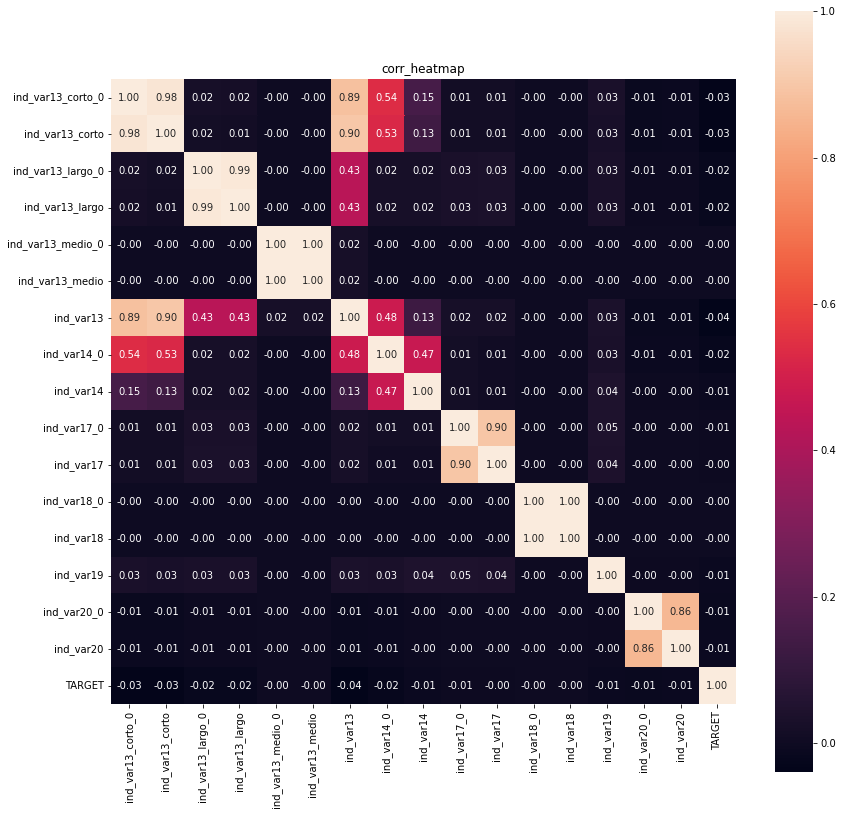

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# 15개의 컬럼만 heatmap으로 시각화

sample_df = train_df[columns[30:46]]
sample_df['TARGET']=y

# 출력되는 heatmap matrix의 크기 설정
figure = plt.figure(figsize=(14,14))
plt.title('corr_heatmap')
corr_matrix = sample_df.corr()
sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
plt.show()

figure.savefig('image.png')

In [146]:
#figure = plt.figure()


ind_var5=-0.14

In [100]:
# TARGET값의 value갯수를 확인
# y.value_counts().to_frame().T
# 레이블을 확인해본 결과 불균형 데이터셋임을 알 수 있다.
# 73012:3008
y.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

### **SMOTE** : Synthetic Minority Oversampling Technique
SMOTE의 동작 방식은 데이터의 개수가 적은 클래스의 표본을 가져온 뒤 임의의 값을 추가하여 새로운 샘플을 만들어 데이터에 추가하는 오버샘플링 방식이다.

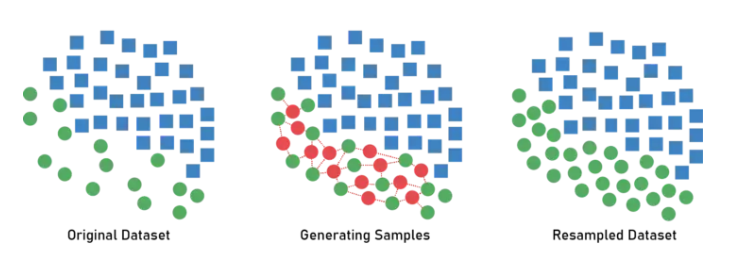

In [101]:
# SMOTE를 사용해서 RESAMPLEING을 해서 데이터의 갯수를 늘린다.
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_resample(X, y)
y_smote.value_counts()

0    73012
1    73012
Name: TARGET, dtype: int64

In [102]:
# train, valid데이터로 분할
from sklearn.model_selection import train_test_split

# stratify=y_smote, y_smote의 레이블을 보고 train과 valid에 일정한 비율 0.2로 클래스가 분할 될 수 있도록
train_x, valid_x, train_y, valid_y = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y_smote ,random_state=42)

In [103]:
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((116819, 335), (29205, 335), (116819,), (29205,))

In [104]:
print(train_y.value_counts())
print(valid_y.value_counts())

1    58410
0    58409
Name: TARGET, dtype: int64
0    14603
1    14602
Name: TARGET, dtype: int64


In [105]:
# 정규화(Normalize)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
valid_x = scaler.transform(valid_x)

## 머신러닝 코드 추가

In [106]:
# colab에는 기본적으로 xgboost가 설치되어 있다.
#!pip install xgboost

In [107]:
# 머신러닝 알고리즘 코드 추가
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
model = XGBClassifier(n_estimators=100, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
model.fit(train_x, 
          train_y, 
          early_stopping_rounds=100,
          eval_metric="auc", 
          eval_set=[(train_x, train_y), (valid_x, valid_y)])

[0]	validation_0-auc:0.871971	validation_1-auc:0.870403
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.872743	validation_1-auc:0.871293
[2]	validation_0-auc:0.886374	validation_1-auc:0.883913
[3]	validation_0-auc:0.886867	validation_1-auc:0.884237
[4]	validation_0-auc:0.888789	validation_1-auc:0.885933
[5]	validation_0-auc:0.888816	validation_1-auc:0.885913
[6]	validation_0-auc:0.891251	validation_1-auc:0.888513
[7]	validation_0-auc:0.892104	validation_1-auc:0.889152
[8]	validation_0-auc:0.894307	validation_1-auc:0.891693
[9]	validation_0-auc:0.899144	validation_1-auc:0.896353
[10]	validation_0-auc:0.901783	validation_1-auc:0.898904
[11]	validation_0-auc:0.904447	validation_1-auc:0.901973
[12]	validation_0-auc:0.906917	validation_1-auc:0.904642
[13]	validation_0-auc:0.90775	validation_1-auc:0.905089
[14]	validation_0-auc:0.908571	validation_1-auc:0.90605

XGBClassifier(random_state=156)

In [ ]:
# LGBM 모델을 추가


In [108]:
xgb_roc_score = roc_auc_score(valid_y, model.predict_proba(valid_x)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.9539


## 심층신경망 코드

In [109]:
# 분류
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.random import set_seed
from tensorflow.keras.optimizers import Adam

set_seed(100)

col_num = train_x.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(col_num,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

lr=0.001
adam = Adam(learning_rate=lr)

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])      
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                3360      
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,481
Trainable params: 3,481
Non-trainable params: 0
_________________________________________________________________


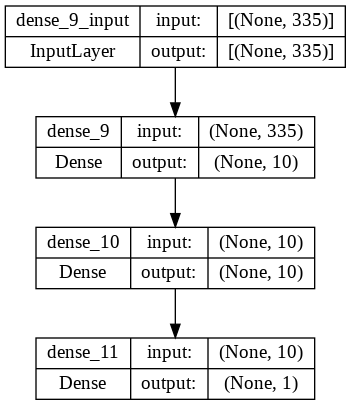

In [110]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [111]:
epochs = 500
batch_size = 1024
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(valid_x, valid_y))

Epoch 1/500
115/115 [==============================] - 1s 6ms/step - loss: 0.6211 - accuracy: 0.6937 - val_loss: 0.5739 - val_accuracy: 0.7675
Epoch 2/500
115/115 [==============================] - 1s 4ms/step - loss: 0.5572 - accuracy: 0.7735 - val_loss: 0.5396 - val_accuracy: 0.7802
Epoch 3/500
115/115 [==============================] - 1s 4ms/step - loss: 0.5298 - accuracy: 0.7820 - val_loss: 0.5184 - val_accuracy: 0.7885
Epoch 4/500
115/115 [==============================] - 1s 5ms/step - loss: 0.5125 - accuracy: 0.7879 - val_loss: 0.5048 - val_accuracy: 0.7906
Epoch 5/500
115/115 [==============================] - 1s 4ms/step - loss: 0.5008 - accuracy: 0.7905 - val_loss: 0.4950 - val_accuracy: 0.7938
Epoch 6/500
115/115 [==============================] - 1s 5ms/step - loss: 0.4924 - accuracy: 0.7919 - val_loss: 0.4882 - val_accuracy: 0.7939
Epoch 7/500
115/115 [==============================] - 1s 4ms/step - loss: 0.4856 - accuracy: 0.7933 - val_loss: 0.4823 - val_accuracy: 0.7950

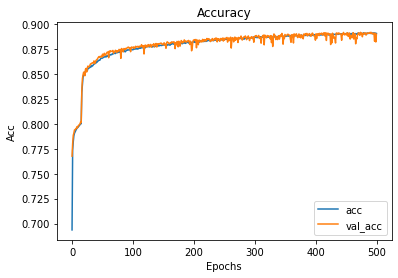

In [112]:
# accuracy & val_accuracy를 그리는 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

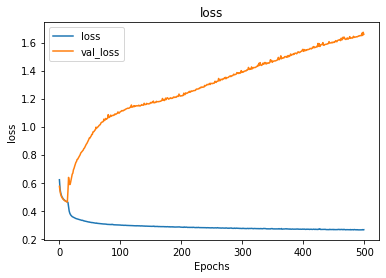

In [113]:
# accuracy & val_accuracy를 그리는 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [114]:
# 모델을 한 번 학습하고 성능을 개선하기 위한 포인트
# 콜백함수를 사용해서 학습에 적용해 보자.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# val_loss 모니터링해서 성능이 5epoch동안 val_loss가 낮아지지 않으면 조기 종료
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, restore_best_weights=True)

# val_loss 가장 낮은 값을 가질때마다 모델저장
check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

# fit()함수의 callbacks에 전달할 리스트
callbacks = [early_stop, check_point]

In [115]:
# 기존에 모델이 학습된 가중치 상태를 초기화
#initial_weights = model.get_weights()
#model.set_weights(initial_weights)

In [116]:
epochs = 500
batch_size = 1024
history = model.fit(train_x, 
                    train_y,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(valid_x, valid_y), 
                    callbacks=callbacks)

Epoch 1/500
115/115 [==============================] - 1s 6ms/step - loss: 0.2646 - accuracy: 0.8904 - val_loss: 1.6586 - val_accuracy: 0.8909
Epoch 2/500
115/115 [==============================] - 1s 5ms/step - loss: 0.2630 - accuracy: 0.8910 - val_loss: 1.6658 - val_accuracy: 0.8891
Epoch 3/500
115/115 [==============================] - 1s 5ms/step - loss: 0.2634 - accuracy: 0.8908 - val_loss: 1.6598 - val_accuracy: 0.8916
Epoch 4/500
115/115 [==============================] - 1s 5ms/step - loss: 0.2639 - accuracy: 0.8905 - val_loss: 1.6668 - val_accuracy: 0.8889
Epoch 5/500
115/115 [==============================] - 1s 5ms/step - loss: 0.2630 - accuracy: 0.8905 - val_loss: 1.6654 - val_accuracy: 0.8904
Epoch 6/500
115/115 [==============================] - 1s 5ms/step - loss: 0.2638 - accuracy: 0.8910 - val_loss: 1.6596 - val_accuracy: 0.8920
Epoch 7/500
115/115 [==============================] - 1s 4ms/step - loss: 0.2635 - accuracy: 0.8908 - val_loss: 1.6669 - val_accuracy: 0.8905

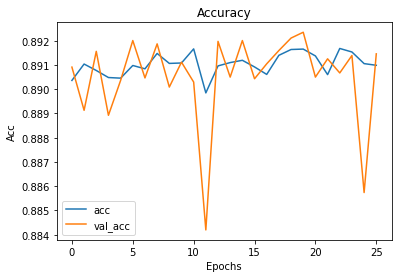

In [117]:
# accuracy & val_accuracy를 그리는 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()